In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)


# Get the unique words
print(vectorizer.get_feature_names())


# from the term-document matrix, create the BoW matrix
print(X.toarray())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']
[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [16]:
sentences = ['Data Science is the best.',
             'Data Science has cool topics.',
             'Are these the best topics?',
             'Is Data Science the best track?']

vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# Get the unique words
print(vectorizer.get_feature_names())

# from the term-document matrix, create the BoW matrix
print(X.toarray())

['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']
[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]


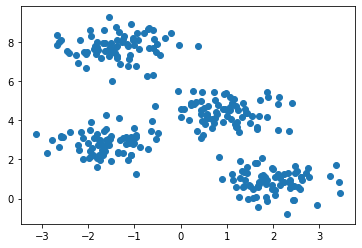

In [36]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [37]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)

[[-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]]


In [38]:
my_list = [0,0,0,0]
the_list = np.array(km.cluster_centers_)
for i in X:
    its_list = []
    for j in the_list:
        its_list.append(np.sqrt((i[0]-j[0])**2 +(i[1]-j[1])**2))
    my_list[its_list.index(min(its_list))] += 1

In [40]:
my_list

[75, 75, 75, 75]

In [41]:
predictions = km.predict(X)
print(Counter(predictions))

NameError: name 'Counter' is not defined

In [19]:
one = np.array([1, 1])
two = np.array([2, 2])
three = np.array([3, 8])

In [22]:
ls = [one, two, three]
for i in ls:
    for j in ls:
        if i is not j:
            print(i, j)
            print(np.sqrt((i[0]-j[0])**2 +(i[1]-j[1])**2))

[1 1] [2 2]
1.4142135623730951
[1 1] [3 8]
7.280109889280518
[2 2] [1 1]
1.4142135623730951
[2 2] [3 8]
6.082762530298219
[3 8] [1 1]
7.280109889280518
[3 8] [2 2]
6.082762530298219


In [23]:
np.linalg.norm(one-three)

7.280109889280518

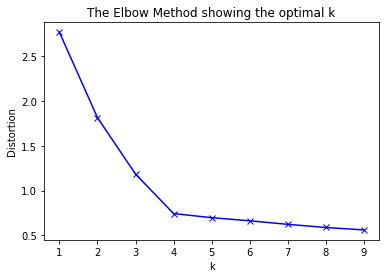

In [24]:

import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

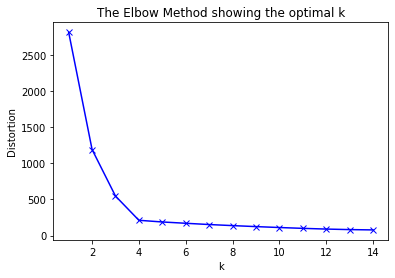

In [25]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

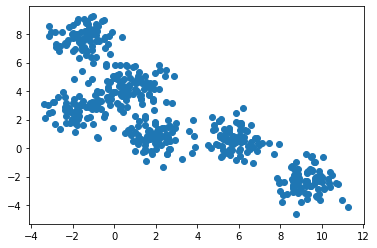

In [26]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

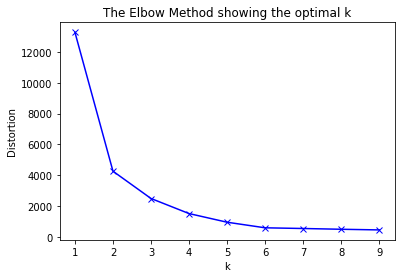

In [27]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(Data)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names())
print(X.toarray())

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
[[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [59]:
km = KMeans(n_clusters=2)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)
print(km.predict(X))

[[0.   0.   0.25 0.5  0.25 0.5  0.   0.25 0.25 0.   0.   0.   0.   0.
  0.   0.   0.25 0.25 0.25 0.   0.25 0.25 0.   0.25 0.25 0.   0.25 0.
  0.25 0.   0.25 0.   0.25]
 [0.25 0.25 0.   0.   0.   0.   0.25 0.   0.   0.25 0.25 0.25 1.   0.25
  0.25 0.25 0.   0.   0.   0.25 0.   0.   0.25 0.   0.   0.25 0.   0.25
  0.   0.25 0.   0.25 0.  ]]
[0 0 1 1 0 0 1 1]


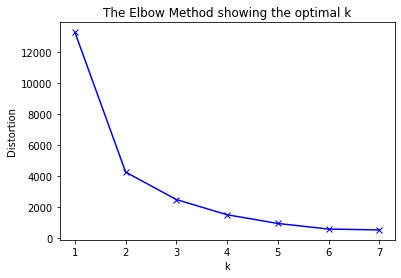

In [53]:
sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(Data)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [64]:
confused = vectorizer.transform(['My ninja key.'])
km.predict(confused)

array([0], dtype=int32)